In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
dogs=pd.read_csv('dogs4.csv')
dogs.head()

outcome_subtype outcome_type sex_upon_outcome                    breed  \
0          Foster     Adoption      Intact Male            Greyhound Mix   
1          Foster     Adoption    Spayed Female                Boxer Mix   
2         Partner     Transfer      Intact Male  Chihuahua Shorthair Mix   
3         Partner     Transfer    Neutered Male           Pomeranian Mix   
4         Partner     Transfer    Spayed Female             Shih Tzu Mix   

   color intake_condition intake_type    size  good_with_children  \
0    Tan           Normal       Stray   large            2.625100   
1  Brown           Normal       Stray   large            5.835203   
2    Red           Normal       Stray  teacup            2.544920   
3  White           Normal       Stray  teacup            2.835409   
4  White           Normal       Stray   small            4.391545   

   good_with_other_dogs  ...  protectiveness  trainability    energy  \
0              3.615374  ...        3.390986      2.873580  4.167703   
1              2.925542  ...        3.144705      3.010407  4.231642   
2              4.314612  ...        3.620172      1.832087  2.834511   
3              2.936067  ...        3.770284      3.482516  2.037904   
4              4.955892  ...        2.924166      4.698562  2.944130   

    barking   age  length_of_stay   log_age  log_lenghtOfStay  \
0  1.974363    63              31  4.143135          3.433987   
1  2.737943    70              33  4.248495          3.496508   
2  5.015286  2942               6  7.986845          1.791759   
3  3.420557  3294               7  8.099858          1.945910   
4  2.754888   375               5  5.926926          1.609438   

   breed_avg_life_expectancy  breed_avg_height  
0                     4198.0             29.00  
1                     4015.0             24.00  
2                     5475.0              6.50  
3                     5110.0              6.50  
4                     5110.0              9.75  

[5 rows x 26 columns]

In [3]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4258 entries, 0 to 4257
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   outcome_subtype            4258 non-null   object 
 1   outcome_type               4258 non-null   object 
 2   sex_upon_outcome           4258 non-null   object 
 3   breed                      4258 non-null   object 
 4   color                      4258 non-null   object 
 5   intake_condition           4258 non-null   object 
 6   intake_type                4258 non-null   object 
 7   size                       4258 non-null   object 
 8   good_with_children         4258 non-null   float64
 9   good_with_other_dogs       4258 non-null   float64
 10  shedding                   4258 non-null   float64
 11  grooming                   4258 non-null   float64
 12  drooling                   4258 non-null   float64
 13  coat_length                4258 non-null   float

# Clustering
Prepare your preprocessed dataset for clustering
- do you need to remove some variables?
- do you need to normalize?

In [4]:
dogs.columns

Index(['outcome_subtype', 'outcome_type', 'sex_upon_outcome', 'breed', 'color',
       'intake_condition', 'intake_type', 'size', 'good_with_children',
       'good_with_other_dogs', 'shedding', 'grooming', 'drooling',
       'coat_length', 'good_with_strangers', 'playfulness', 'protectiveness',
       'trainability', 'energy', 'barking', 'age', 'length_of_stay', 'log_age',
       'log_lenghtOfStay', 'breed_avg_life_expectancy', 'breed_avg_height'],
      dtype='object')

##### Comment
I am excluding all categorical data for the clustering analysis. I an also excluding the columns 'breed_avg_life_expectancy' and 'breed_avg_height' which contain average data for the breed.
I have chosen the 'log_age' and 'log_lengthOfStay' because they have lower standard deviation and a distribution more similar to a Gausian.

In [3]:
temp=dogs[['good_with_children', 'good_with_other_dogs',
       'shedding', 'grooming', 'drooling', 'coat_length',
       'good_with_strangers', 'playfulness', 'protectiveness', 'trainability',
       'energy', 'barking', 'log_age', 'log_lenghtOfStay']]

In [4]:
X=temp.values

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
minmax=MinMaxScaler()
X=minmax.fit_transform(X)

## Centroid-Based
- identify the best parameter choice (k)
- use plots to visualize the clusters (you can use dimensionality reduction techniques)
- evaluate quantitatively and qualitatively:
    - compare the clusters with some categorical variable (for example using crosstab, or scatter plots)
    - evaluate the clusters using some quantitative metric (e.g., silhouette)
    - do you see something interesting?

In [7]:
from sklearn.cluster import KMeans

##### Comment

To choose the optimal number of clusters to use for the KMeans algorithm I am executing the clustering iteratively, using a number of clusters ranging from 2 to 25.

At every iteration, the Sum of Squared Errors (SSE) is saved into a list. 
By plotting the SSE against the number of clusters we can decide upon the best number of clusters to use.

In [9]:
k_min=2
k_max=25
k_values=np.arange(k_min,k_max)
sse_values=list()
for k in k_values:
    km=KMeans(n_clusters=k, n_init=100, random_state=42)
    km.fit(X)
    sse_values.append(km.inertia_)

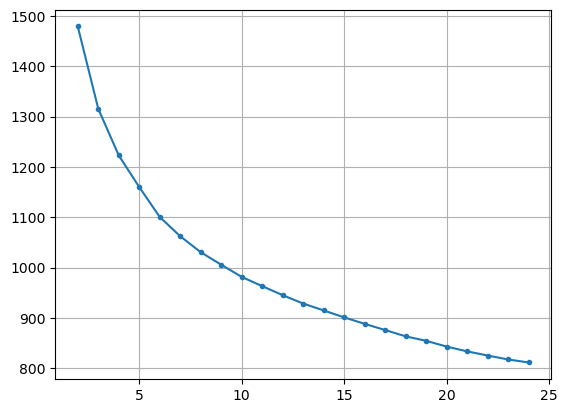

In [10]:
plt.plot(k_values,sse_values, marker='.')
plt.grid()
plt.show()

##### Comment
From the curve above there is enough reduction in the SSE to warrant using between 7 and 9 clusters.

To decide I am trying KMeans with all these values and comparing the cluster centres separation and silhouette score to make a decision.

In [11]:
kmeans=KMeans(n_clusters=7, n_init=100)  
kmeans.fit(X)

KMeans(n_clusters=7, n_init=100)

In [12]:
dogs['KMeans_Label7']=kmeans.labels_

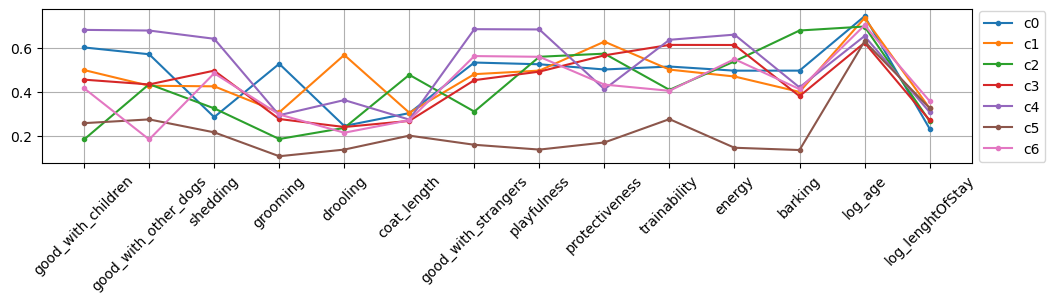

In [14]:
plt.figure(figsize=(12,2))
for l in np.unique(kmeans.labels_):
    plt.plot(temp.columns, kmeans.cluster_centers_[l], marker='.', label='c%s' % l)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [13]:
silhouette_score(X, kmeans.labels_)

0.15648473245532246

In [14]:
s_scores=silhouette_samples(X, dogs['KMeans_Label7'].values)

for s in np.unique(dogs['KMeans_Label7'].values):
    print(s, np.mean(s_scores[dogs['KMeans_Label7'].values==s]),
         np.std(s_scores[dogs['KMeans_Label7'].values==s]))

0 0.07601677587718675 0.08728036734240542
1 0.0643174699555156 0.07060471799543228
2 0.1805500954633744 0.07099353164524476
3 0.2386135519870875 0.08920283357074385
4 0.19135680103187447 0.08277255715914346
5 0.07196557554672638 0.05864730315640139
6 0.33683880046830755 0.14348520277568863


In [15]:
kmeans=KMeans(n_clusters=8, n_init=100)  
kmeans.fit(X)

KMeans(n_init=100)

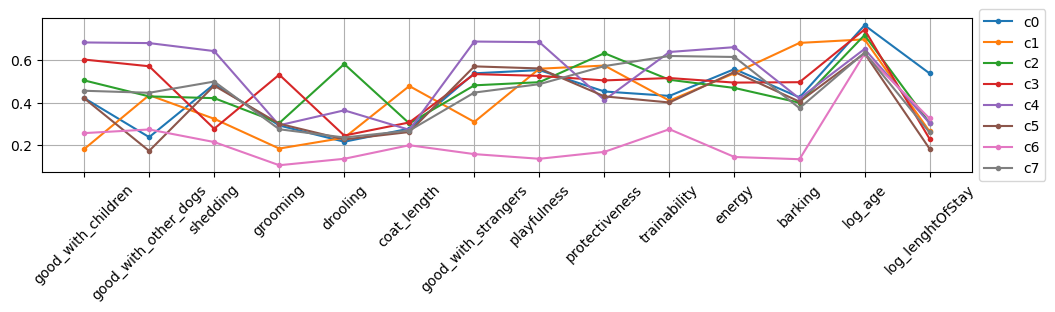

In [16]:
dogs['KMeans_Label8']=kmeans.labels_

plt.figure(figsize=(12,2))
for l in np.unique(kmeans.labels_):
    plt.plot(temp.columns, kmeans.cluster_centers_[l], marker='.', label='c%s' % l)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [17]:
silhouette_score(X, kmeans.labels_)

0.14060265316979312

In [18]:
s_scores=silhouette_samples(X, dogs['KMeans_Label8'].values)

for s in np.unique(dogs['KMeans_Label8'].values):
    print(s, np.mean(s_scores[dogs['KMeans_Label8'].values==s]),
         np.std(s_scores[dogs['KMeans_Label8'].values==s]))

0 0.11210200481394289 0.07187121989732037
1 0.2262896931993381 0.09278047310877552
2 0.06276806422075303 0.07352344632406689
3 0.07150414567919974 0.08887967293088747
4 0.18699485496407944 0.08557899357565356
5 0.13073473624484067 0.0718086275986022
6 0.32094050696542376 0.1550053130608538
7 0.06757653796105285 0.05846521287861228


In [19]:
kmeans=KMeans(n_clusters=9, n_init=100)  
kmeans.fit(X)

KMeans(n_clusters=9, n_init=100)

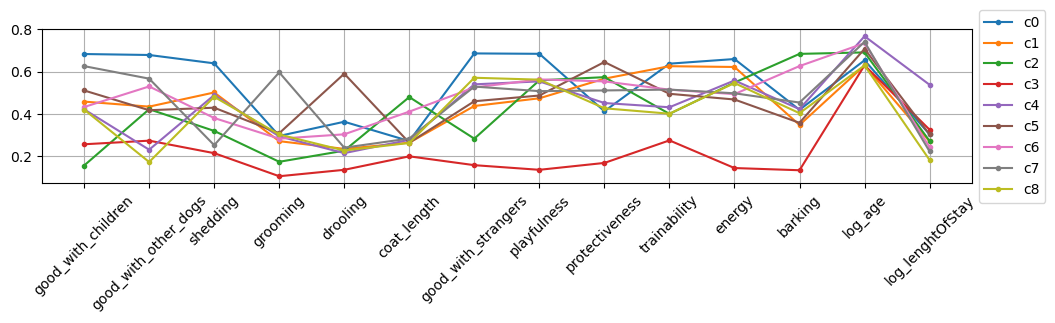

In [20]:
dogs['KMeans_Label9']=kmeans.labels_

plt.figure(figsize=(12,2))
for l in np.unique(kmeans.labels_):
    plt.plot(temp.columns, kmeans.cluster_centers_[l], marker='.', label='c%s' % l)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [21]:
silhouette_score(X, kmeans.labels_)

0.1327295533420204

In [22]:
s_scores=silhouette_samples(X, dogs['KMeans_Label9'].values)

for s in np.unique(dogs['KMeans_Label9'].values):
    print(s, np.mean(s_scores[dogs['KMeans_Label9'].values==s]),
         np.std(s_scores[dogs['KMeans_Label9'].values==s]))

0 0.18034679423224656 0.08831754803137727
1 0.07717599069416771 0.05912724125580104
2 0.1962584316864455 0.07039677834479593
3 0.31992992233849826 0.15530228249311995
4 0.11619344704684224 0.0727962106545565
5 0.0645942562921238 0.073445944599803
6 0.06488375591685609 0.06192039786992065
7 0.09072633037070237 0.08633344526108074
8 0.12828277356241216 0.07289748417272142


##### Comment
In all three instances of the KMeans algorithm the 'log_age' attribute does not show a lot of separation between centroids; the 'log_lengthOfStay' using  8 or 9 centroids seems more discriminant, however, there is a reduction in the silhouette score by adding more centroids. 

I am taking both 'log_age' and 'log_lengthOfStay' out and attempting KMeans again to check if the separation is better.

In [25]:
dogs=dogs.drop(['KMeans_Label7','KMeans_Label8','KMeans_Label9'], axis=1)

In [11]:
X=X[:, :12]
temp=temp.drop(['log_age','log_lenghtOfStay'], axis=1)

sse_values2=list()
for k in k_values:
    km=KMeans(n_clusters=k, n_init=100, random_state=42)
    km.fit(X)
    sse_values2.append(km.inertia_)

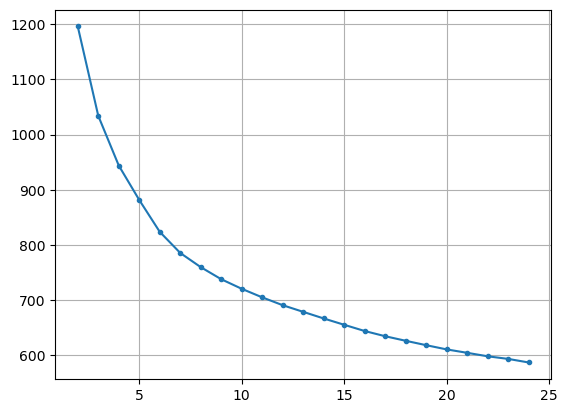

In [12]:
plt.plot(k_values,sse_values2, marker='.')
plt.grid()
plt.show()

##### Comment
Having removed the two time attributes, it seems that 7 clusters is the best trade off between number of clusters and significant enough reduction in the SSE.

In [13]:
kmeans=KMeans(n_clusters=7, n_init=100)  
kmeans.fit(X)

KMeans(n_clusters=7, n_init=100)

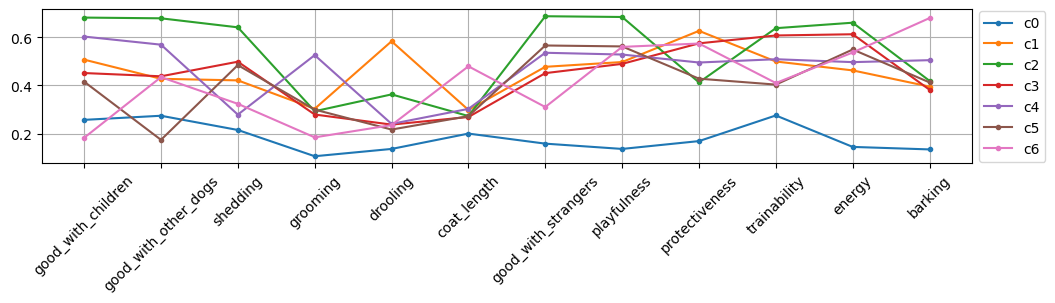

In [14]:
dogs['KMeans_Label7']=kmeans.labels_

plt.figure(figsize=(12,2))
for l in np.unique(kmeans.labels_):
    plt.plot(temp.columns, kmeans.cluster_centers_[l], marker='.', label='c%s' % l)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [15]:
silhouette_score(X, kmeans.labels_)

0.194234562867085

In [16]:
s_scores=silhouette_samples(X, dogs['KMeans_Label7'].values)

for s in np.unique(dogs['KMeans_Label7'].values):
    print(s, np.mean(s_scores[dogs['KMeans_Label7'].values==s]),
         np.std(s_scores[dogs['KMeans_Label7'].values==s]))

0 0.38720266821598165 0.16049086471639587
1 0.08571375226071994 0.08408895860464113
2 0.24481657316589947 0.09945379246589375
3 0.07963973818552868 0.0723082820533786
4 0.07485386443209348 0.09884551034755903
5 0.24486824238686755 0.07617601913473121
6 0.28980488095397877 0.10454658325865289


##### Comment
Using 7 clusters without any of the time attributes, we obtain a better silhouette score. Keeping this last result for Kmeans clustering.

In [20]:
dogs = dogs.rename(columns={'KMeans_Label7': 'KMeans_Label'})

In [21]:
pd.crosstab(dogs['KMeans_Label'],dogs['size'])

size          giant  large  medium  small  teacup  toy
KMeans_Label                                          
0                 0     39      46      0       0    0
1               114    160     100     36       2    5
2                 0    695     124     52       0    3
3                26    340     315     33       3   44
4                 1     19      78    195      17  124
5                 0    766      41     10       2   17
6                11      6      13    103     692   26

In [22]:
pd.crosstab(dogs['KMeans_Label'],dogs['outcome_type'])

outcome_type  Adoption  Died  Euthanasia  Missing  Return to Owner  Transfer
KMeans_Label                                                                
0                   14     1           6        0                2        62
1                   77     4          55        0               23       258
2                  233     6          63        0               30       542
3                  184     9          67        0               32       469
4                   71     4          30        1                9       319
5                  131     7         155        5               36       502
6                  185     5          66        1               21       573

In [24]:
pd.crosstab(dogs['outcome_subtype'],dogs['KMeans_Label'])

KMeans_Label          0    1    2    3    4    5    6
outcome_subtype                                      
Aggressive            5   18   21   21    2   72    1
At Vet                0    1    2    1    1    2    1
Behavior              0    7    4    6    1   23    1
Court/Investigation   0    2    1    2    1    4    0
Enroute               0    0    0    2    0    0    0
Foster               14   71  208  167   65  122  153
In Foster             1    1    0    0    2    1    2
In Kennel             0    2    3    5    1    6    4
In Surgery            0    0    1    1    1    0    0
Medical               0    3    2    5    1    6    3
Offsite               0    6   25   17    6    9   32
Owner Collect         2   23   30   32    9   36   21
Partner              62  258  542  469  319  502  573
Possible Theft        0    0    0    0    0    4    0
Rabies Risk           0    3    4    5    0    6    1
Suffering             1   22   31   28   25   43   59

In [25]:
pd.crosstab(dogs['KMeans_Label'],dogs['intake_condition'])

intake_condition  Aged  Feral  Injured  Normal  Nursing  Other  Pregnant  Sick
KMeans_Label                                                                  
0                    1      0        4      75        4      0         0     1
1                    4      1       25     353       15      1         1    17
2                   12      1       47     747       20      3         1    43
3                   10      1       35     639       28      0         1    47
4                    3      0       30     359       18      2         1    21
5                    0      0       65     662       38      2         2    67
6                    9      0       85     683       28      3         0    43

In [26]:
breed_counts=dogs['breed'].value_counts().index.tolist()
top20=breed_counts[0:20]
dogs20=dogs[dogs['breed'].isin(top20)]

In [28]:
pd.crosstab(dogs20['breed'],dogs20['KMeans_Label'])

KMeans_Label                0   1    2    3   4    5    6
breed                                                    
Anatol Shepherd Mix         0   9    0   15   1    0   11
Australian Cattle Dog Mix   0   4    3  139   0    2    0
Australian Shepherd Mix     0   3    9   47   2    0    0
Beagle Mix                  0   0   19    8  36    2    3
Border Collie Mix           0   0   20   40  18   10    0
Boxer Mix                   0  87    4    4   3    3    0
Chihuahua Shorthair Mix     0   5    0   12   7    6  707
Chow Chow Mix               0  31    1    3   0    0    0
Dachshund Mix               0  33    1   10  36    0   64
German Shepherd Mix         0  18    6  226   3    7    3
Great Pyrenees Mix          1  58    1    7   0    0    0
Labrador Retriever Mix      5  12  653   47   4    6    1
Miniature Schnauzer Mix     0  14    0   47   6    0    2
Pit Bull Mix                0  11    3   14   2  735    2
Plott Hound Mix            47   0    0    0   0    0    0
Pug Mix                     0   0   23    6   4    2    0
Rottweiler Mix              1  36    0   10   0    0    0
Shih Tzu Mix                0   0    0    1  92    0    0
Siberian Husky Mix          0   0   51    3   0    0    0
Yorkshire Terrier Mix       0   0    0    0  64    0    0

In [29]:
pd.crosstab(dogs['breed'],dogs['KMeans_Label'])

KMeans_Label                         0  1  2    3   4  5   6
breed                                                       
American Bulldog Mix                26  0  0    0   0  0   0
American Staffordshire Terrier Mix   2  9  0   10   1  3   3
Anatol Shepherd Mix                  0  9  0   15   1  0  11
Australian Cattle Dog Mix            0  4  3  139   0  2   0
Australian Kelpie Mix                0  1  4   17   4  1   0
...                                 .. .. ..  ...  .. ..  ..
Standard Schnauzer Mix               0  3  0    3   1  0   0
Toy Fox Terrier Mix                  0  0  0    1   1  0   4
Treeing Walker Coonhound Mix         0  2  3    0   0  0   0
Whippet Mix                          0  1  2    1   1  0   0
Yorkshire Terrier Mix                0  0  0    0  64  0   0

[64 rows x 7 columns]

##### Comment
Looking at how the clustering compares to categorical attributes, there is no relationship with any attribute other than the breed. Most dogs belonging to the same (broadly speaking) breed group, are often found under the same KMeans_Label. The Pit Bull Mix looks to be evenly divided between two clusters.

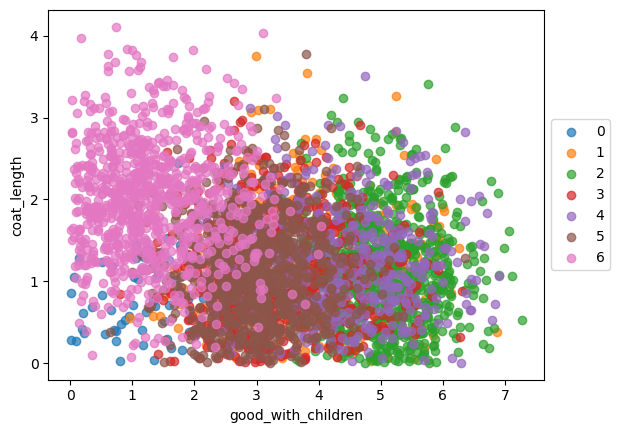

In [30]:
x='good_with_children'
y='coat_length'

for i in np.unique(dogs['KMeans_Label']):
    plt.scatter(dogs[dogs['KMeans_Label']==i][x],dogs[dogs['KMeans_Label']==i][y], label=i, alpha=0.7)
plt.xlabel(x)
plt.ylabel(y)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

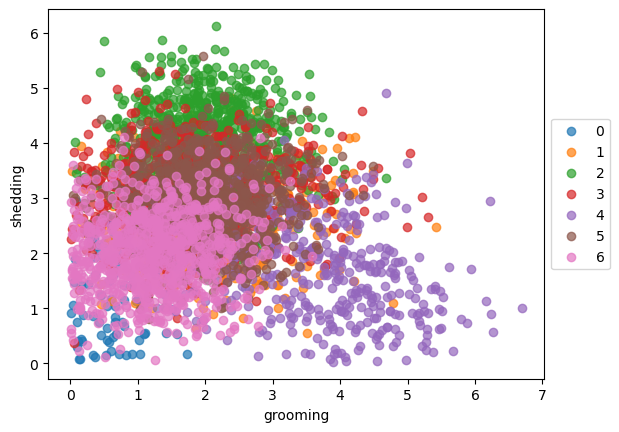

In [31]:
x='grooming'
y='shedding'

for i in np.unique(dogs['KMeans_Label']):
    plt.scatter(dogs[dogs['KMeans_Label']==i][x],dogs[dogs['KMeans_Label']==i][y], label=i, alpha=0.7)
plt.xlabel(x)
plt.ylabel(y)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

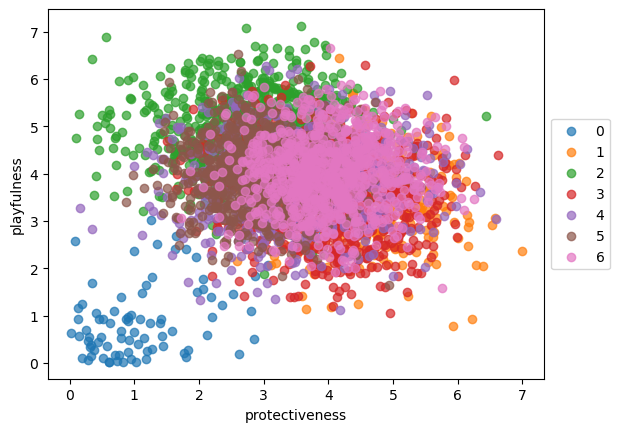

In [32]:
x='protectiveness'
y='playfulness'

for i in np.unique(dogs['KMeans_Label']):
    plt.scatter(dogs[dogs['KMeans_Label']==i][x],dogs[dogs['KMeans_Label']==i][y], label=i, alpha=0.7)
plt.xlabel(x)
plt.ylabel(y)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

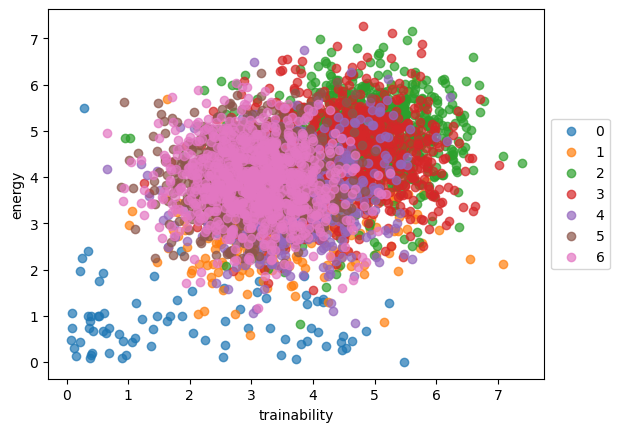

In [33]:
x='trainability'
y='energy'

for i in np.unique(dogs['KMeans_Label']):
    plt.scatter(dogs[dogs['KMeans_Label']==i][x],dogs[dogs['KMeans_Label']==i][y], label=i, alpha=0.7)
plt.xlabel(x)
plt.ylabel(y)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [34]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [35]:
pca=PCA(n_components=2)
X_pca = pca.fit_transform(X)

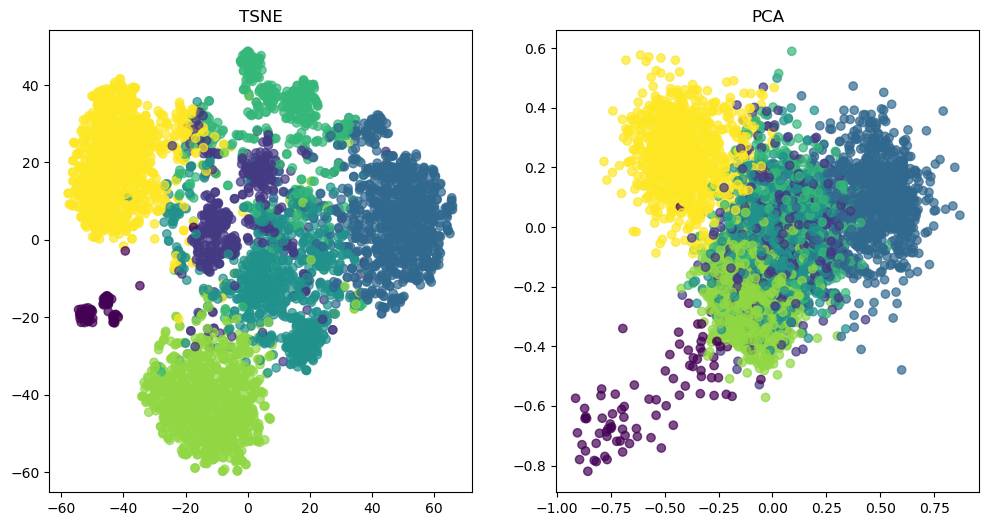

In [36]:
dim1 = 0
dim2 = 1

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X_tsne[:, dim1], X_tsne[:, dim2], c=dogs['KMeans_Label'], alpha=0.7)
plt.title('TSNE')

plt.subplot(1,2,2)
plt.scatter(X_pca[:, dim1], X_pca[:, dim2], c=dogs['KMeans_Label'], alpha=0.7)
plt.title('PCA')

plt.show()

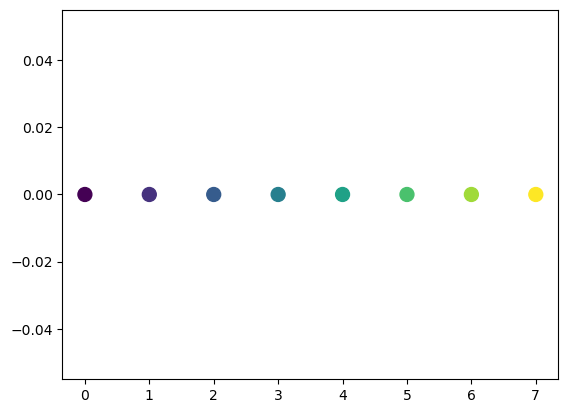

In [37]:
plt.scatter(np.arange(8), np.zeros(8), c=np.arange(8), cmap='viridis', s=100)

##### Comment

Class 0 (purple) are dogs with low energy, low playfulness and low protectiveness - I believe, also by looking at the crosstab with the most common breeds, that this class contains the Plott Hound Mix breed, which had a lot of missing values and very low values in general in all categories. 

Considering that KMeans is not very robust with outliers, I am going to try the clustering algorithm again without the Plott Hound Mix breed.

In [38]:
dogs_noPH=dogs[dogs['breed']!='Plott Hound Mix']

In [39]:
temp1=dogs_noPH[['good_with_children', 'good_with_other_dogs',
       'shedding', 'grooming', 'drooling', 'coat_length',
       'good_with_strangers', 'playfulness', 'protectiveness', 'trainability',
       'energy', 'barking']]
X1=temp1.values

In [40]:
minmax=MinMaxScaler()
X1=minmax.fit_transform(X1)

In [41]:
k_min=2
k_max=25
k_values=np.arange(k_min,k_max)
sse_values_noPH=list()
for k in k_values:
    km=KMeans(n_clusters=k, n_init=100, random_state=42)
    km.fit(X1)
    sse_values_noPH.append(km.inertia_)

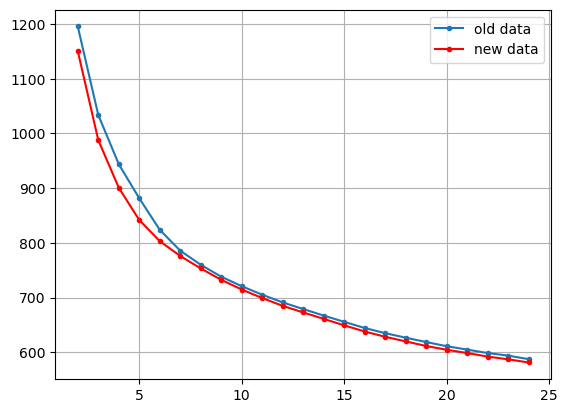

In [42]:
plt.plot(k_values,sse_values2, marker='.', label='old data')
plt.plot(k_values,sse_values_noPH, marker='.', color='r', label='new data')
plt.legend()
plt.grid()
plt.show()

##### Comment
Trying again with 7 and 8 clusters.

In [43]:
kmeans=KMeans(n_clusters=7, n_init=100)  
kmeans.fit(X1)

KMeans(n_clusters=7, n_init=100)

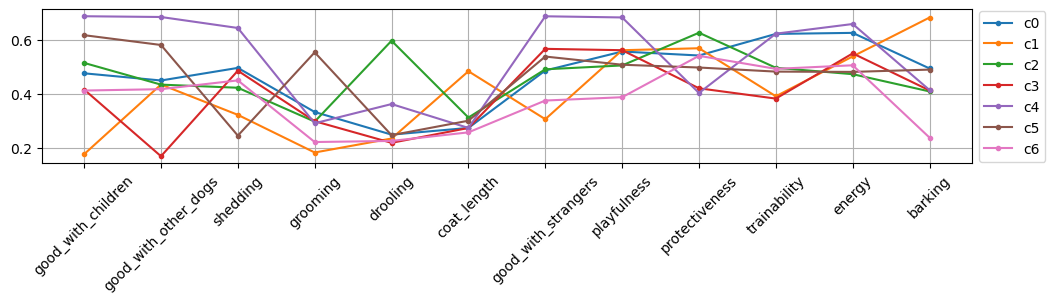

In [45]:
dogs_noPH.loc[:,'KMeans_Label7']=kmeans.labels_

plt.figure(figsize=(12,2))
for l in np.unique(kmeans.labels_):
    plt.plot(temp1.columns, kmeans.cluster_centers_[l], marker='.', label='c%s' % l)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [46]:
silhouette_score(X1, kmeans.labels_)

0.18186740580677277

In [47]:
s_scores=silhouette_samples(X1, dogs_noPH['KMeans_Label7'].values)

for s in np.unique(dogs_noPH['KMeans_Label7'].values):
    print(s, np.mean(s_scores[dogs_noPH['KMeans_Label7'].values==s]),
         np.std(s_scores[dogs_noPH['KMeans_Label7'].values==s]))

0 0.07411500390481549 0.06021677088397758
1 0.2941773974639387 0.10224074136807039
2 0.08720746791331709 0.084165949609235
3 0.25084081978951883 0.07503001975542316
4 0.21812154773512074 0.08978693976633005
5 0.09412069141300142 0.09877227721548124
6 0.05618074039759327 0.0716111637321149


In [48]:
kmeans=KMeans(n_clusters=8, n_init=100)  
kmeans.fit(X1)

KMeans(n_init=100)

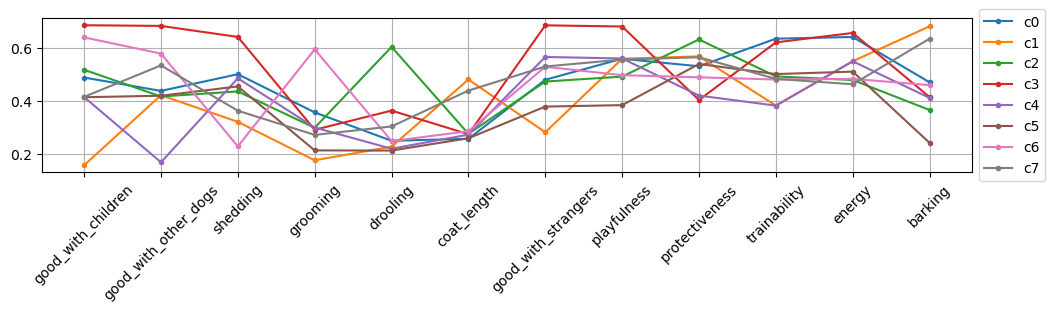

In [65]:
dogs_noPH.loc[:,'KMeans_Label8']=kmeans.labels_

plt.figure(figsize=(12,2))
for l in np.unique(kmeans.labels_):
    plt.plot(temp1.columns, kmeans.cluster_centers_[l], marker='.', label='c%s' % l)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [67]:
silhouette_score(X1, kmeans.labels_)

0.1696691037098058

In [66]:
s_scores=silhouette_samples(X1, dogs_noPH['KMeans_Label8'].values)

for s in np.unique(dogs_noPH['KMeans_Label8'].values):
    print(s, np.mean(s_scores[dogs_noPH['KMeans_Label8'].values==s]),
         np.std(s_scores[dogs_noPH['KMeans_Label8'].values==s]))

0 0.08410295772967126 0.05771360623184685
1 0.24880206193753024 0.07959507535098592
2 0.09668422029810957 0.08449319109211677
3 0.20759574247876755 0.09104675306908978
4 0.24685211920283617 0.07657247189333698
5 0.05771149687952181 0.07228940740290739
6 0.11330202614073843 0.0953784334669798
7 0.08056311844866933 0.0760226578597016


##### Comment
The configuration with 7 clusters has a lower SSE but a slightly higher silhouette score compared to the initial dataset.

Before making a decision I am going to check how the new clustering compares against some categorical data.

In [62]:
pd.crosstab(dogs_noPH['KMeans_Label7'],dogs_noPH['size'])

size           giant  large  medium  small  teacup  toy
KMeans_Label7                                          
0                  3    280     225     55       3   47
1                  7      6       7     95     689   23
2                110    153      79     36       2    5
3                  0    762      32      8       2    5
4                  0    688     108     58       0    3
5                  0     11      44    165      15  114
6                 32    120     180     12       5   22

In [69]:
pd.crosstab(dogs_noPH['KMeans_Label7'],dogs_noPH['outcome_type'])

outcome_type   Adoption  Died  Euthanasia  Missing  Return to Owner  Transfer
KMeans_Label7                                                                
0                   146     7          55        0               28       377
1                   181     5          65        1               19       556
2                    74     5          46        0               20       240
3                   130     6         151        5               35       482
4                   226     7          63        0               29       532
5                    54     3          19        1                8       264
6                    79     3          42        0               12       235

In [63]:
breed_counts=dogs_noPH['breed'].value_counts().index.tolist()
top20n=breed_counts[0:20]
dogs20n=dogs_noPH[dogs_noPH['breed'].isin(top20n)]

In [64]:
pd.crosstab(dogs20n['breed'],dogs20n['KMeans_Label7'])

KMeans_Label7                0    1   2    3    4   5    6
breed                                                     
Anatol Shepherd Mix          1    7   4    0    0   0   24
Australian Cattle Dog Mix   10    0   2    4    3   0  129
Australian Shepherd Mix     51    0   2    0    7   0    1
Beagle Mix                  18    1   1    3   23  20    2
Border Collie Mix           76    0   0    2    7   1    2
Boxer Mix                    4    0  87    3    3   3    1
Chihuahua Shorthair Mix     17  704   5    4    0   5    2
Chow Chow Mix                1    0  23    0    1   0   10
Dachshund Mix               21   60  34    0    1  28    0
German Shepherd Mix        160    3  17    7    5   0   71
Golden Retriever Mix         0    0   1    0   28   0    1
Great Pyrenees Mix           4    0  57    0    0   0    6
Labrador Retriever Mix      47    1  13    5  651   4    7
Miniature Schnauzer Mix     52    1  13    0    0   3    0
Pit Bull Mix                17    2   9  731    3   2    3
Pug Mix                      2    0   0    2   24   4    3
Rottweiler Mix               1    0  35    1    0   0   10
Shih Tzu Mix                 0    0   0    0    0  91    2
Siberian Husky Mix           4    0   0    0   50   0    0
Yorkshire Terrier Mix        0    0   0    0    0  64    0

In [70]:
pd.crosstab(dogs_noPH['breed'],dogs_noPH['KMeans_Label7'])

KMeans_Label7                        0  1  2  3  4   5    6
breed                                                      
American Bulldog Mix                 0  0  0  0  0   0   26
American Staffordshire Terrier Mix   1  0  6  2  0   1   18
Anatol Shepherd Mix                  1  7  4  0  0   0   24
Australian Cattle Dog Mix           10  0  2  4  3   0  129
Australian Kelpie Mix               21  0  1  1  3   1    0
...                                 .. .. .. .. ..  ..  ...
Standard Schnauzer Mix               5  0  1  0  0   1    0
Toy Fox Terrier Mix                  2  4  0  0  0   0    0
Treeing Walker Coonhound Mix         0  0  2  0  3   0    0
Whippet Mix                          0  0  1  0  2   1    1
Yorkshire Terrier Mix                0  0  0  0  0  64    0

[63 rows x 7 columns]

In [59]:
tsne = TSNE(n_components=2)
X1_tsne = tsne.fit_transform(X1)

In [60]:
pca=PCA(n_components=2)
X1_pca = pca.fit_transform(X1)

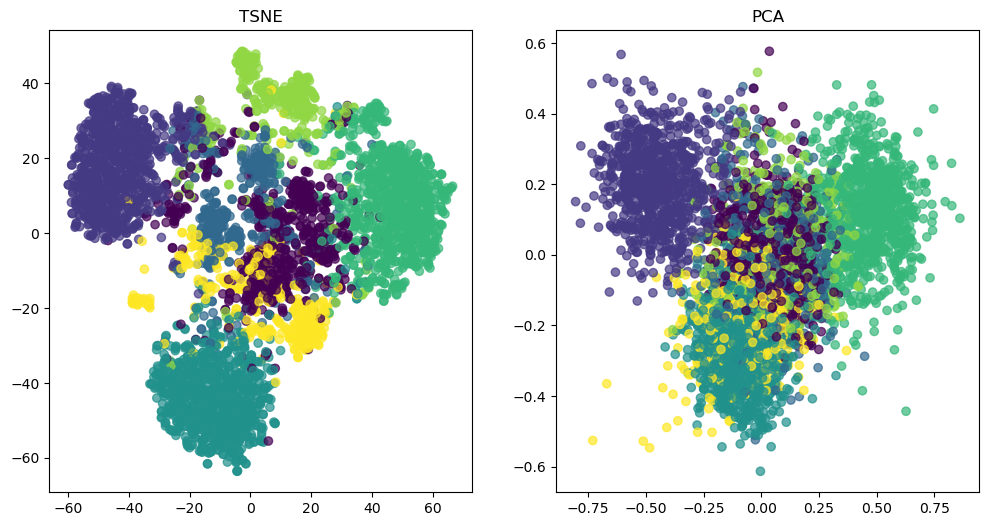

In [61]:
dim1 = 0
dim2 = 1

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X1_tsne[:, dim1], X1_tsne[:, dim2], c=dogs_noPH['KMeans_Label7'], alpha=0.7)
plt.title('TSNE')

plt.subplot(1,2,2)
plt.scatter(X1_pca[:, dim1], X1_pca[:, dim2], c=dogs_noPH['KMeans_Label7'], alpha=0.7)
plt.title('PCA')

plt.show()

##### Comment
Although the silhouette score is a bit lower, the clustering on the modified dataset performs better when compared to breeds. For example, the Pit Bull Mix is now well identified in one cluster, while previously the group was split in two. The clustering is also good with other breeds.

In [76]:
dogs_noPH=dogs_noPH.drop(['KMeans_Label8','KMeans_Label'],axis=1)
dogs_noPH = dogs_noPH.rename(columns={'KMeans_Label7': 'KMeans_Label'})

## Density-based
- choose the correct parameters
- evaluate quantitatively and qualitatively

In [78]:
from sklearn.cluster import DBSCAN, OPTICS, HDBSCAN
from scipy.spatial.distance import pdist, squareform

In [79]:
D = squareform(pdist(X1))

In [80]:
list_of_min_pts_th_distances = list()

for min_pts in [4, 8, 16, 32, 64, 128, 256]:
    min_pts_th_distances = list()
    
    for i in range(len(X1)):
        min_pts_th_distances.append(sorted(D[i])[min_pts+1])
        
    list_of_min_pts_th_distances.append(min_pts_th_distances)

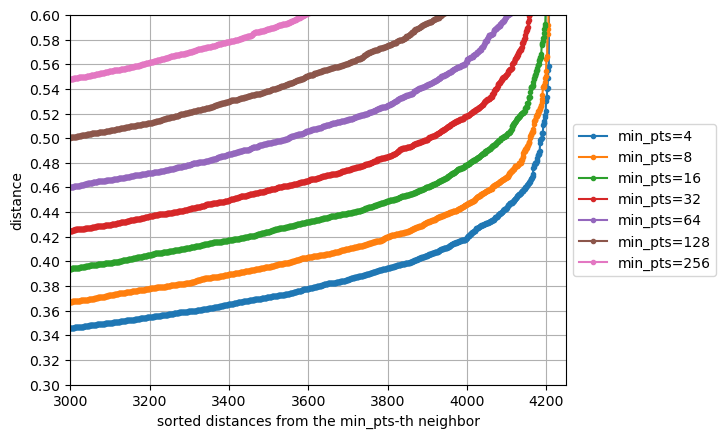

In [85]:
for i, min_pts in enumerate([4, 8, 16, 32, 64, 128, 256]):
    min_pts_th_distances = list_of_min_pts_th_distances[i]
    plt.plot(np.arange(len(X1)), sorted(min_pts_th_distances), marker='.', label='min_pts=%s' % min_pts)

plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sorted distances from the min_pts-th neighbor')
plt.ylabel('distance')
plt.xlim(3000,4250)
plt.yticks(np.arange(0.0,1.0,0.02))
plt.ylim(0.30,0.6)
plt.show()

##### Comment
To decide on parameters epsilon and min_samples I have plotted the sorted distances from the kth nearest neighbour for different values of k. 

There is not a lot of variability in the shape of the curves; as a starting point I am going to try a variety of values for epsilon with min_samples=4.

In [87]:
eps=[0.34,0.35,0.36,0.37,0.38,0.39,0.4]
for i in eps:
    dbscan=DBSCAN(eps=i, min_samples=4)
    dbscan.fit(X1)
    print(i)
    labels, counts = np.unique(dbscan.labels_, return_counts=True)
    for i, l in enumerate(labels):
        if l == -1:
            print('Noise: %s (%.2f)' % (counts[i], counts[i]/len(X)))
        else:
            print('Cluster %s: %s (%.2f)' % (l, counts[i], counts[i]/len(X)))

0.34
Noise: 451 (0.11)
Cluster 0: 3726 (0.88)
Cluster 1: 22 (0.01)
Cluster 2: 2 (0.00)
Cluster 3: 3 (0.00)
Cluster 4: 4 (0.00)
Cluster 5: 3 (0.00)
0.35
Noise: 328 (0.08)
Cluster 0: 3850 (0.90)
Cluster 1: 22 (0.01)
Cluster 2: 6 (0.00)
Cluster 3: 5 (0.00)
0.36
Noise: 245 (0.06)
Cluster 0: 3932 (0.92)
Cluster 1: 23 (0.01)
Cluster 2: 6 (0.00)
Cluster 3: 5 (0.00)
0.37
Noise: 175 (0.04)
Cluster 0: 4005 (0.94)
Cluster 1: 3 (0.00)
Cluster 2: 23 (0.01)
Cluster 3: 5 (0.00)
0.38
Noise: 132 (0.03)
Cluster 0: 4056 (0.95)
Cluster 1: 23 (0.01)
0.39
Noise: 81 (0.02)
Cluster 0: 4127 (0.97)
Cluster 1: 3 (0.00)
0.4
Noise: 56 (0.01)
Cluster 0: 4155 (0.98)


##### Comment
With 4 points we do not get any good clustering. For higher values of epsilon there is only one cluster. For smaller values of epsilon there are more clusters, however, the vast majority of the data is still grouped into one cluster (or it is noise).

In [89]:
eps=[0.32,0.33,0.34,0.35,0.36,0.37,0.38]
for i in eps:
    dbscan=DBSCAN(eps=i, min_samples=8)
    dbscan.fit(X1)
    print(i)
    labels, counts = np.unique(dbscan.labels_, return_counts=True)
    for i, l in enumerate(labels):
        if l == -1:
            print('Noise: %s (%.2f)' % (counts[i], counts[i]/len(X)))
        else:
            print('Cluster %s: %s (%.2f)' % (l, counts[i], counts[i]/len(X)))

0.32
Noise: 1098 (0.26)
Cluster 0: 3084 (0.72)
Cluster 1: 14 (0.00)
Cluster 2: 8 (0.00)
Cluster 3: 7 (0.00)
0.33
Noise: 862 (0.20)
Cluster 0: 3299 (0.77)
Cluster 1: 18 (0.00)
Cluster 2: 14 (0.00)
Cluster 3: 3 (0.00)
Cluster 4: 8 (0.00)
Cluster 5: 7 (0.00)
0.34
Noise: 636 (0.15)
Cluster 0: 3531 (0.83)
Cluster 1: 21 (0.00)
Cluster 2: 12 (0.00)
Cluster 3: 5 (0.00)
Cluster 4: 6 (0.00)
0.35
Noise: 477 (0.11)
Cluster 0: 3706 (0.87)
Cluster 1: 22 (0.01)
Cluster 2: 6 (0.00)
0.36
Noise: 360 (0.08)
Cluster 0: 3828 (0.90)
Cluster 1: 23 (0.01)
0.37
Noise: 260 (0.06)
Cluster 0: 3928 (0.92)
Cluster 1: 23 (0.01)
0.38
Noise: 191 (0.04)
Cluster 0: 3997 (0.94)
Cluster 1: 23 (0.01)


##### Comment
A similar pattern is observed also using a different number of points(8) for varying values of epsilon.

## Hierarchical
- choose the correct parameters
- show and discuss different dendograms using different algorithms
- evaluate quantitatively and qualitatively

In [90]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [91]:
Dh = pdist(X1, metric='euclidean')

In [92]:
link_s = linkage(Dh, method='single', metric='euclidean')

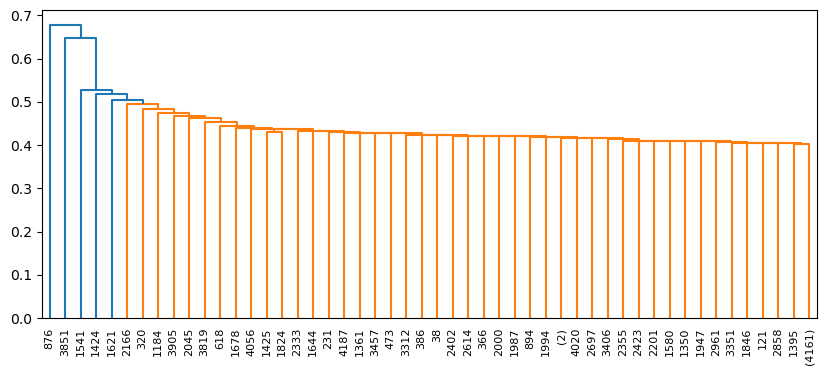

In [95]:
plt.figure(figsize=(10,4))
res_s = dendrogram(link_s, truncate_mode='lastp',p=50, color_threshold=0.5)

In [104]:
hlabel_single = fcluster(link_s, t=0.4, criterion='distance')

In [105]:
labels, counts = np.unique(hlabel_single, return_counts=True)

for i, l in enumerate(labels):
    print('Cluster %s: %s (%.2f)' % (l, counts[i], counts[i]/len(X)))

Cluster 1: 1 (0.00)
Cluster 2: 1 (0.00)
Cluster 3: 2 (0.00)
Cluster 4: 4156 (0.98)
Cluster 5: 1 (0.00)
Cluster 6: 1 (0.00)
Cluster 7: 1 (0.00)
Cluster 8: 1 (0.00)
Cluster 9: 1 (0.00)
Cluster 10: 1 (0.00)
Cluster 11: 1 (0.00)
Cluster 12: 1 (0.00)
Cluster 13: 1 (0.00)
Cluster 14: 1 (0.00)
Cluster 15: 1 (0.00)
Cluster 16: 1 (0.00)
Cluster 17: 1 (0.00)
Cluster 18: 1 (0.00)
Cluster 19: 1 (0.00)
Cluster 20: 1 (0.00)
Cluster 21: 1 (0.00)
Cluster 22: 1 (0.00)
Cluster 23: 1 (0.00)
Cluster 24: 1 (0.00)
Cluster 25: 1 (0.00)
Cluster 26: 1 (0.00)
Cluster 27: 1 (0.00)
Cluster 28: 1 (0.00)
Cluster 29: 1 (0.00)
Cluster 30: 1 (0.00)
Cluster 31: 1 (0.00)
Cluster 32: 1 (0.00)
Cluster 33: 1 (0.00)
Cluster 34: 1 (0.00)
Cluster 35: 1 (0.00)
Cluster 36: 1 (0.00)
Cluster 37: 1 (0.00)
Cluster 38: 1 (0.00)
Cluster 39: 1 (0.00)
Cluster 40: 1 (0.00)
Cluster 41: 1 (0.00)
Cluster 42: 1 (0.00)
Cluster 43: 1 (0.00)
Cluster 44: 1 (0.00)
Cluster 45: 1 (0.00)
Cluster 46: 1 (0.00)
Cluster 47: 1 (0.00)
Cluster 48: 1 (0.00

##### Comment
Using single linkage does not produce any clustering. All points are in one cluster and there is then a myriad of clusters containing a single point.

In [106]:
link_c = linkage(Dh, method='complete', metric='euclidean')

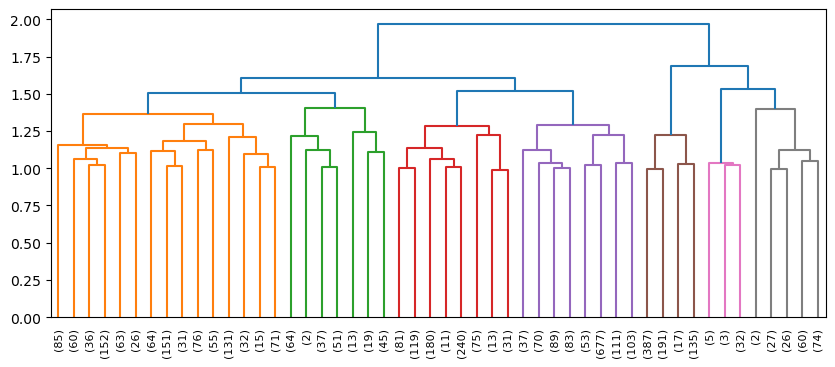

In [126]:
plt.figure(figsize=(10,4))
res_s = dendrogram(link_c, truncate_mode='lastp',p=50, color_threshold=1.5)

In [124]:
hlabel_complete = fcluster(link_c, t=1.5, criterion='distance')
labels, counts = np.unique(hlabel_complete, return_counts=True)

for i, l in enumerate(labels):
    print('Cluster %s: %s (%.2f)' % (l, counts[i], counts[i]/len(X)))

Cluster 1: 1048 (0.25)
Cluster 2: 231 (0.05)
Cluster 3: 750 (0.18)
Cluster 4: 1223 (0.29)
Cluster 5: 730 (0.17)
Cluster 6: 40 (0.01)
Cluster 7: 189 (0.04)


In [125]:
silhouette_score(X1, hlabel_complete)

0.14399557563664284

In [127]:
dogs_noPH.loc[:,'Hlabel_c']=hlabel_complete

In [128]:
s_scores=silhouette_samples(X1, dogs_noPH['Hlabel_c'].values)

for s in np.unique(dogs_noPH['Hlabel_c'].values):
    print(s, np.mean(s_scores[dogs_noPH['Hlabel_c'].values==s]),
         np.std(s_scores[dogs_noPH['Hlabel_c'].values==s]))

1 -0.033666037312653316 0.08570252142466353
2 0.1434790077227569 0.10575657945286702
3 0.25704629813540564 0.11449060225608901
4 0.09703396905975341 0.136711493209125
5 0.34045214581510735 0.08697796609945076
6 0.3697794742729038 0.18573056398076168
7 0.1784402759155007 0.09585221110321408


In [129]:
pd.crosstab(dogs_noPH['size'],dogs_noPH['Hlabel_c'])

Hlabel_c    1   2    3    4    5   6   7
size                                    
giant      48   0    0    7    1   0  96
large     459   9  596  881    5  36  34
medium    261  29   83  236    7   4  55
small     168  95   62   62   41   0   1
teacup     44  10    0    3  659   0   0
toy        68  88    9   34   17   0   3

In [138]:
pd.crosstab(dogs_noPH['outcome_type'],dogs_noPH['Hlabel_c'])

Hlabel_c           1    2    3    4    5   6    7
outcome_type                                     
Adoption         224   36  202  223  155  12   38
Died              13    0    7    9    4   0    3
Euthanasia        97   14   59  179   58   4   30
Missing            0    0    0    6    1   0    0
Return to Owner   48    9   23   46   17   0    8
Transfer         666  172  459  760  495  24  110

In [136]:
pd.crosstab(dogs_noPH['intake_condition'],dogs_noPH['Hlabel_c'])

Hlabel_c            1    2    3    4    5   6    7
intake_condition                                  
Aged               11    3   10    4    8   1    2
Feral               0    0    1    1    0   0    1
Injured            61   20   44   78   73   3   11
Normal            882  187  640  992  585  33  155
Nursing            39    7   16   49   24   3   12
Other               2    1    3    2    2   0    1
Pregnant            0    1    1    3    0   0    1
Sick               53   12   35   94   38   0    6

In [132]:
breed_counts=dogs_noPH['breed'].value_counts().index.tolist()
top20=breed_counts[0:20]
dogs20=dogs_noPH[dogs_noPH['breed'].isin(top20)]

In [133]:
pd.crosstab(dogs20['breed'],dogs20['Hlabel_c'])

Hlabel_c                     1   2    3    4    5  6   7
breed                                                   
Anatol Shepherd Mix         31   0    0    2    1  0   2
Australian Cattle Dog Mix   13   0    1  131    0  0   3
Australian Shepherd Mix     45   0    3   13    0  0   0
Beagle Mix                  13   1   43    9    2  0   0
Border Collie Mix           70   1    4   13    0  0   0
Boxer Mix                   66   3    0   14    0  0  18
Chihuahua Shorthair Mix     54   2    1   10  669  0   1
Chow Chow Mix                4   0    1    4    0  1  25
Dachshund Mix              114   6    2    2   20  0   0
German Shepherd Mix        198   3    4   48    3  0   7
Golden Retriever Mix         2   0    9   19    0  0   0
Great Pyrenees Mix          16   0    0    6    0  2  43
Labrador Retriever Mix      61   2  578   77    0  6   4
Miniature Schnauzer Mix     66   0    0    3    0  0   0
Pit Bull Mix                49   1    0  713    2  0   2
Pug Mix                      4   0    3   28    0  0   0
Rottweiler Mix               1   1    0    4    0  1  40
Shih Tzu Mix                 4  80    8    1    0  0   0
Siberian Husky Mix           3   0   48    3    0  0   0
Yorkshire Terrier Mix        6  56    0    2    0  0   0

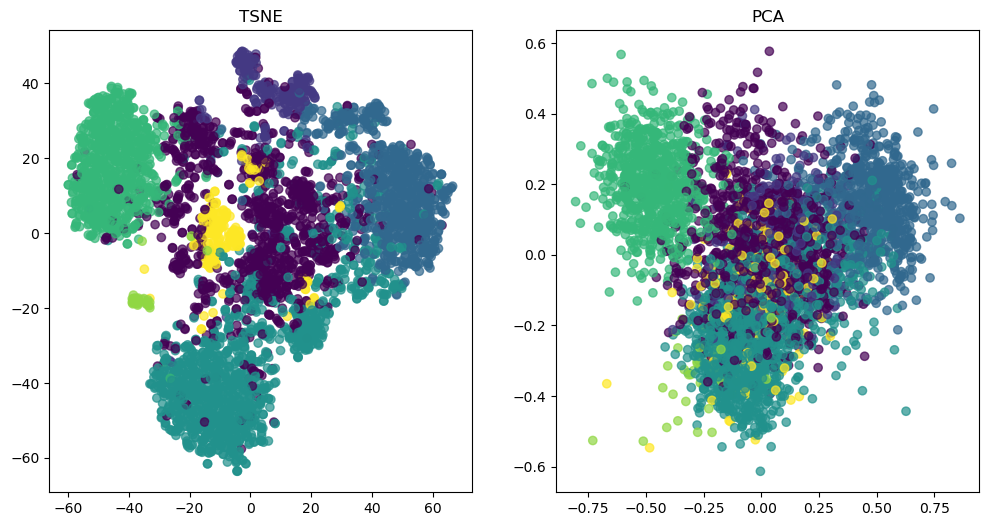

In [134]:
dim1 = 0
dim2 = 1

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X1_tsne[:, dim1], X1_tsne[:, dim2], c=dogs_noPH['Hlabel_c'], alpha=0.7)
plt.title('TSNE')

plt.subplot(1,2,2)
plt.scatter(X1_pca[:, dim1], X1_pca[:, dim2], c=dogs_noPH['Hlabel_c'], alpha=0.7)
plt.title('PCA')

plt.show()

##### Comment
Using hierarchical clustering with complete linkage gives overall a similar result to the KMeans algorithm when looking at breeds. It's not performing significantly better when compared to other variables.

In [139]:
link_w = linkage(Dh, method='ward', metric='euclidean')

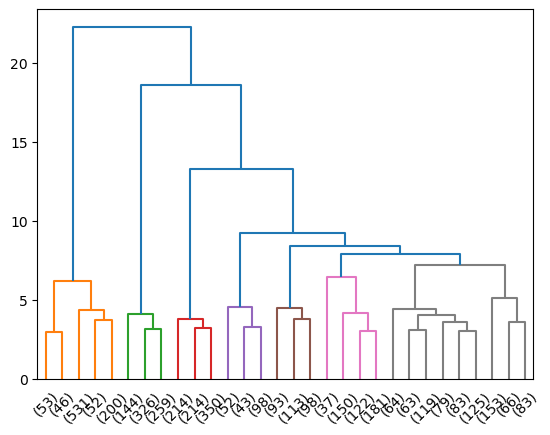

In [169]:
res_w = dendrogram(link_w, truncate_mode='lastp', color_threshold=7.5)

In [167]:
hlabels_ward = fcluster(link_w, t=7.5, criterion='distance')
labels, counts = np.unique(hlabels_ward, return_counts=True)

for i, l in enumerate(labels):
    print('Cluster %s: %s (%.2f)' % (l, counts[i], counts[i]/len(X)))

Cluster 1: 882 (0.21)
Cluster 2: 729 (0.17)
Cluster 3: 778 (0.18)
Cluster 4: 193 (0.05)
Cluster 5: 304 (0.07)
Cluster 6: 490 (0.12)
Cluster 7: 835 (0.20)


In [168]:
silhouette_score(X1, hlabels_ward)

0.166395016074843

In [172]:
dogs_noPH.loc[:,'Hlabel_w']=hlabels_ward

In [174]:
s_scores=silhouette_samples(X1, dogs_noPH['Hlabel_w'].values)

for s in np.unique(dogs_noPH['Hlabel_w'].values):
    print(s, np.mean(s_scores[dogs_noPH['Hlabel_w'].values==s]),
         np.std(s_scores[dogs_noPH['Hlabel_w'].values==s]))

1 0.2344401212337241 0.1138034379024685
2 0.3256364787974336 0.09255749291424287
3 0.2667257136864881 0.07984300922273967
4 0.18469580064614888 0.0885100228433979
5 0.08732372964888309 0.10618490195526759
6 0.0826908596255871 0.08673233371531341
7 -0.06431089471006292 0.08036144670922019


In [176]:
hlabels_ward1 = fcluster(link_w, t=7, criterion='distance')
labels, counts = np.unique(hlabels_ward1, return_counts=True)

for i, l in enumerate(labels):
    print('Cluster %s: %s (%.2f)' % (l, counts[i], counts[i]/len(X)))

Cluster 1: 882 (0.21)
Cluster 2: 729 (0.17)
Cluster 3: 778 (0.18)
Cluster 4: 193 (0.05)
Cluster 5: 304 (0.07)
Cluster 6: 490 (0.12)
Cluster 7: 533 (0.13)
Cluster 8: 302 (0.07)


In [152]:
silhouette_score(X1, hlabels_ward1)

0.15011672999230954

In [177]:
dogs_noPH.loc[:,'Hlabel_w1']=hlabels_ward1

In [178]:
s_scores=silhouette_samples(X1, dogs_noPH['Hlabel_w1'].values)

for s in np.unique(dogs_noPH['Hlabel_w1'].values):
    print(s, np.mean(s_scores[dogs_noPH['Hlabel_w1'].values==s]),
         np.std(s_scores[dogs_noPH['Hlabel_w1'].values==s]))

1 0.18397157393514565 0.102553373957595
2 0.26394321518290464 0.08324144747913996
3 0.2539171454171605 0.07923008753876246
4 0.16757706898652447 0.089203769703576
5 0.07194156800989869 0.10407013333663116
6 0.06874318023769561 0.0857567782280187
7 -0.011292764156568007 0.07883318994011024
8 -0.0064941961142378655 0.0874154259949533


##### Comment
Using a threshold of 7.5 produces the best result in terms of the silhouette score.

In [181]:
dogs_noPH=dogs_noPH.drop('Hlabel_w1',axis=1)

In [182]:
pd.crosstab(dogs_noPH['intake_condition'],dogs_noPH['Hlabel_w'])

Hlabel_w            1    2    3    4    5    6    7
intake_condition                                   
Aged               10    9    0    3    5    6    6
Feral               1    0    0    0    1    0    1
Injured            49   74   59   16   17   28   47
Normal            754  585  620  155  251  404  705
Nursing            20   23   36    7   13   20   31
Other               3    2    2    0    1    0    3
Pregnant            1    0    1    1    2    1    0
Sick               44   36   60   11   14   31   42

In [183]:
pd.crosstab(dogs_noPH['size'],dogs_noPH['Hlabel_w'])

Hlabel_w    1    2    3   4    5    6    7
size                                      
giant       0    1    0   0   96    8   47
large     677    3  735   2  110  273  220
medium    114    7   31  12   78  189  244
small      88   37    2  93    2    8  199
teacup      0  661    2   8    1    4   40
toy         3   20    8  78   17    8   85

In [184]:
pd.crosstab(dogs_noPH['outcome_type'],dogs_noPH['Hlabel_w'])

Hlabel_w           1    2    3    4    5    6    7
outcome_type                                      
Adoption         235  156  123   27   57  118  174
Died               7    4    6    0    4    3   12
Euthanasia        63   59  147   12   40   47   73
Missing            0    1    5    0    0    0    1
Return to Owner   27   16   33    6   19   17   33
Transfer         550  493  464  148  184  305  542

In [185]:
pd.crosstab(dogs_noPH['sex_upon_outcome'],dogs_noPH['Hlabel_w'])

Hlabel_w            1    2    3   4    5    6    7
sex_upon_outcome                                  
Intact Female     158  141  166  46   53   82  133
Intact Male       136  131  150  42   52   89  137
Neutered Male     301  240  235  55  104  173  301
Spayed Female     268  208  218  47   85  141  254
Unknown            19    9    9   3   10    5   10

In [186]:
pd.crosstab(dogs20['breed'],dogs20['Hlabel_c'])

Hlabel_c                     1   2    3    4    5  6   7
breed                                                   
Anatol Shepherd Mix         31   0    0    2    1  0   2
Australian Cattle Dog Mix   13   0    1  131    0  0   3
Australian Shepherd Mix     45   0    3   13    0  0   0
Beagle Mix                  13   1   43    9    2  0   0
Border Collie Mix           70   1    4   13    0  0   0
Boxer Mix                   66   3    0   14    0  0  18
Chihuahua Shorthair Mix     54   2    1   10  669  0   1
Chow Chow Mix                4   0    1    4    0  1  25
Dachshund Mix              114   6    2    2   20  0   0
German Shepherd Mix        198   3    4   48    3  0   7
Golden Retriever Mix         2   0    9   19    0  0   0
Great Pyrenees Mix          16   0    0    6    0  2  43
Labrador Retriever Mix      61   2  578   77    0  6   4
Miniature Schnauzer Mix     66   0    0    3    0  0   0
Pit Bull Mix                49   1    0  713    2  0   2
Pug Mix                      4   0    3   28    0  0   0
Rottweiler Mix               1   1    0    4    0  1  40
Shih Tzu Mix                 4  80    8    1    0  0   0
Siberian Husky Mix           3   0   48    3    0  0   0
Yorkshire Terrier Mix        6  56    0    2    0  0   0

##### Comment
Also in this case the best result are seen when comparing with the breed.

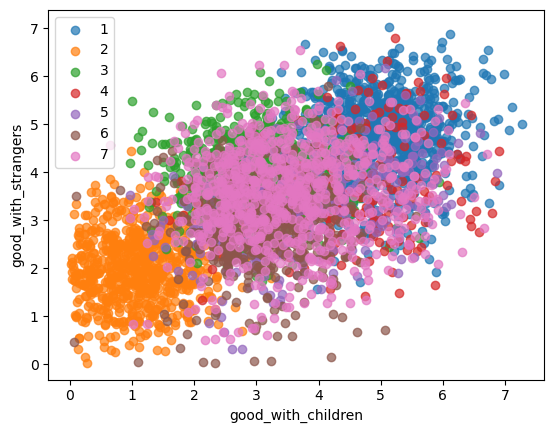

In [187]:
x = 'good_with_children'
y = 'good_with_strangers'

for j in np.unique(dogs_noPH['Hlabel_w']):
    plt.scatter(dogs_noPH[dogs_noPH['Hlabel_w']==j][x], dogs_noPH[dogs_noPH['Hlabel_w']==j][y], 
                alpha=0.7, label=j)

plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()

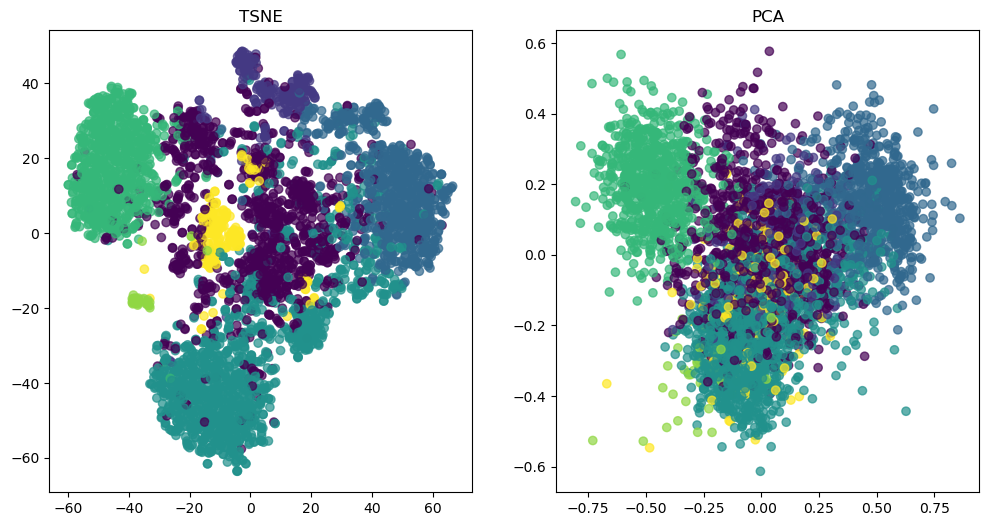

In [188]:
dim1 = 0
dim2 = 1

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X1_tsne[:, dim1], X1_tsne[:, dim2], c=dogs_noPH['Hlabel_c'], alpha=0.7)
plt.title('TSNE')

plt.subplot(1,2,2)
plt.scatter(X1_pca[:, dim1], X1_pca[:, dim2], c=dogs_noPH['Hlabel_c'], alpha=0.7)
plt.title('PCA')

plt.show()

## Discussion
- summarize your findings and insights, also comparing the performance of each model

##### Comment
KMeans and hierarchical clustering performed similarly with clustering. In both cases the clusters are most representative of the breed of the dog. Comparing the silhouette scores, KMeans had a slightly better performance, but looking at TSNE and PCA the clustering is comparable.

The density based algorithm did not perform well on my dataset at all.

Considering the improvement after removing a small part of the data with somewhat anomalous features, I think it might have been worthwhile to re-exhamine the data and, instead of resampling, looking by breed how many of the characteristics I then used for clustering were actually 0. In those cases it might have been better to remove the entry altogether rather than replacing the zeros like I have done.

In [189]:
dogs_noPH.to_csv('dogs4_noPH.csv', index=False)